# Outbreak

An attempt to visualise the somewhat counter-intuitve results of the question with the virus test.

You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=Outbreak.ipynb , 

or - much, much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository. Open a terminal window. Go to the directory where you want a copy of this github repository to live on your computer. Then execute the command:

git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

(alternatively, go to https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath and find the green "Code" button and take it from there)

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Before we start, let's initialise the random number generator. Change the seed to get different outcomes for (peudo)random numbers used in this sheet.

In [2]:
np.random.seed(1984)

Create a population, and represent it with dots. We start by code that generates the x and y positions of a given number of dots.

In [10]:
def CreateTestPopulation(size): # the people we'll test
    xlist = np.random.random(size) # the x positions of the dots that will represent the population
    ylist = np.random.random(size) # the y positions of the dots that will represent the population
    return xlist, ylist

Let us pick a population size of...

In [4]:
PopulationSize = 1000

You can of course change this number. You'll find that far bigger numbers will make the screen with the dots quite crowded (see below). The next segment of code generates the desired number dots and shows them in a plot:

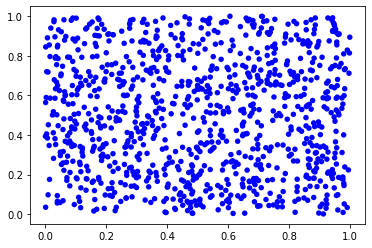

In [5]:
population = CreateTestPopulation(PopulationSize)
plt.scatter(population[0], population[1], s=30, edgecolors='none', c='blue', marker='o')
plt.show()

Now we infect a fraction of them, with a infection probability of: 

In [6]:
PofVirus = 0.005 # 0.5% are infected

Note that the number of infections will randomly fluctuate around a central value given by PopulationSize $\times$ PofVirus. For low infection rates or small population sizes, you might occasionally get zero infections even if PopulationSize $\times$ PofVirus $>1$. Re-running the code segment will re-assign the infections again, randomly, so the numbers will change. Healthy population members will be shown in blue, infected ones in red.

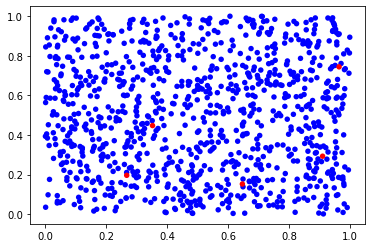

5 of this test-population of 1000 carry the virus.


In [7]:
def infectPopulation(pop, infectionProbability):
    rnd          = np.random.random(len(pop[0]))
    infectedBool = rnd < infectionProbability
    infected     = [[],[]]
    healthy      = [[],[]]
    infected[0]  = np.compress(infectedBool, pop[0])
    infected[1]  = np.compress(infectedBool, pop[1])
    healthyBool  = rnd >= infectionProbability
    healthy[0]   = np.compress(healthyBool, pop[0])
    healthy[1]   = np.compress(healthyBool, pop[1])
    return infected, healthy
    
infected, healthy = infectPopulation(population, PofVirus)
plt.scatter(healthy[0]  , healthy[1]  , s=30, edgecolors='none', c='blue')
plt.scatter(infected[0] , infected[1] , s=30, edgecolors='none', c='red')
plt.show()
print( len(infected[0]), "of this test-population of", len(population[0]), "carry the virus.")

Now test them. Assume a 3% false-positve rate, i.e. $P(positive-test | healthy)=3\%$, and a $0\%$ false negative rate, i.e., $P(positive-test | infected)=1$. 

In [8]:
falsePositiveRate = 0.03
falseNegativeRate = 0.0

You can change these numbers. The code below will simulate a test and will draw a magenta circle around those that tested positive.

For a test-population of 1000 ,
 an infection rate of P(infected)= 0.005 ,
 a false positive rate of 0.03 
 and a false negative rate of 0.0 ,
 I get, for this test, 33 false positives and 5 true positives.

 This means that of those who tested positive, 13.157894736842104 % were actually infected,
 and the remaining 86.8421052631579 % are actually healthy.

 Remember that these results are subject to statistical flucuations. Re-running this code segment should give different results each time


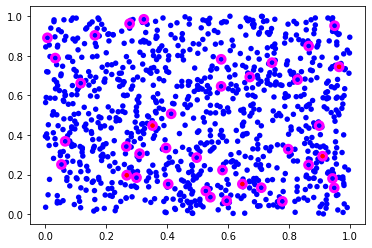

In [9]:
def testPopulation(pop, positiveRate):
    rnd          = np.random.random(len(pop[0]))
    positiveBool = rnd < positiveRate
    positive     = [[],[]]
    positive[0]  = np.compress(positiveBool, pop[0])
    positive[1]  = np.compress(positiveBool, pop[1])
    return positive

falsePositive = testPopulation(healthy, falsePositiveRate)
truePositive  = testPopulation(infected, 1.0-falseNegativeRate)

plt.scatter(healthy[0]      , healthy[1]      , s=30, edgecolors='none', c='blue')
plt.scatter(infected[0]     , infected[1]     , s=30, edgecolors='none', c='red')
plt.scatter(falsePositive[0], falsePositive[1], s=60, edgecolors='magenta', c='none', linewidth=3)
plt.scatter(truePositive[0] , truePositive[1] , s=60, edgecolors='magenta', c='none', linewidth=3)

print("For a test-population of", len(population[0])
      , ",\n an infection rate of P(infected)=", PofVirus
      , ",\n a false positive rate of", falsePositiveRate
      , "\n and a false negative rate of", falseNegativeRate
      , ",\n I get, for this test,", len(falsePositive[0]), "false positives and",
      len(truePositive[0]), "true positives.")
print("\n This means that of those who tested positive,"
      , len(truePositive[0])/(len(falsePositive[0])+len(truePositive[0]))*100
      , "% were actually infected,\n and the remaining"
      , len(falsePositive[0])/(len(falsePositive[0])+len(truePositive[0]))*100
      , "% are actually healthy."
     )
print("\n Remember that these results are subject to statistical flucuations. Re-running this code segment should give different results each time")

## Further tasks 
1) Play around with the numbers (population size, false positive and false negative rate) and see what happens. Also, change the random seed to get a feel for how random fluctuations change the results.

2) Increase the false negative rate and add code to find the fraction of negatively tested people who do in fact carry the virus.